# Load Packages

In [1]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
bq_client = bigquery.Client(project='bolcom-pro-plato-vpm-615')

/Users/kkonings/anaconda3/lib/python3.7/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


# Down here some first try outs with NPS merged with the SuperJoin

In [11]:
query= """
SELECT
  -- nps columns;
  YearOrder
  , MonthOrder
  , nps.retailerid
  , nps.globalid
  , nps.shop
  , nps.cluster
  , nps.shopOrderLinereference
  , npsType
  , npsScore
  , Weight
  , WeightPromotor
  , WeightDetractor
  -- superjoin columns; 
  , SellingParty
  , RetailerType
  , FulfilmentMoment
  , TransporterName
  , CancellationType
FROM
  `bolcom-pro-plato-vpm-615.team.nps_transactioneel_vw` nps 
JOIN `bolcom-pro-plato-vpm-615.team.superjoin_orderdetails` sj
ON nps.shopOrderLinereference = sj.ShopOrderLineReference

 """
df = bq_client.query(query).to_dataframe()

In [12]:
df

,YearOrder,MonthOrder,retailerid,globalid,shop,cluster,shopOrderLinereference,npsType,npsScore,Weight,WeightPromotor,WeightDetractor,SellingParty,RetailerType,FulfilmentMoment,TransporterName,CancellationType
0,2019,2,0,9200000032767262,Audio en Navigatie,Elektronica,1283822994,Detractor,1,1.629306,0.000000,1.629306,bol.com,None,Unknown,None,Klantannulering
1,2019,2,829931,9200000075472002,Audio en Navigatie,Elektronica,1283830922,Passive,8,1.629306,0.000000,0.000000,Lvb,THIRD_PARTY,On time,PostNL,-
2,2019,2,0,9200000031839545,Audio en Navigatie,Elektronica,1283863077,Promotor,10,1.629306,1.629306,0.000000,bol.com,None,On time,PostNL,-
3,2019,2,0,9000000012453395,Audio en Navigatie,Elektronica,1283782361,Promotor,10,1.629306,1.629306,0.000000,bol.com,None,On time,PostNL,-
4,2019,2,0,9200000090963408,Audio en Navigatie,Elektronica,1283809017,Promotor,10,1.629306,1.629306,0.000000,bol.com,None,On time,PostNL,-
5,2019,2,0,9200000064299134,Audio en Navigatie,Elektronica,1283797373,Passive,8,1.629306,0.000000,0.000000,bol.com,None,On time,PostNL,-
6,2019,2,1153096,9200000057058929,Fiets Kamperen en Outdoor Hardwaren,Sport Stijl en Baby,1283907142,Promotor,10,1.039243,1.039243,0.000000,Lvb,BUSINESS,On time,PostNL,-
7,2019,2,0,9200000040076000,Fiets Kamperen en Outdoor Hardwaren,Sport Stijl en Baby,1283866058,Promotor,9,1.039243,1.039243,0.000000,bol.com,None,On time,PostNL,-
8,2019,2,0,9200000043768047,Fiets Kamperen en Outdoor Hardwaren,Sport Stijl en Baby,1283819521,Passive,8,1.039243,0.000000,0.000000,bol.com,None,On time,PostNL,-
9,2019,2,0,9200000047492563,Fiets Kamperen en Outdoor Hardwaren,Sport Stijl en Baby,1283817937,Promotor,9,1.039243,1.039243,0.000000,bol.com,None,On time,PostNL,-


In [112]:
set(df['TransporterName'])

{'Anders',
 'Bezorgafspraak',
 'Bpost Belgie',
 'Bpost Briefpost',
 'Briefpost',
 'DHL Germany',
 'DHL Parcel',
 'DHLFORYOU',
 'DPD Belgie',
 'DPD Nederland',
 'Dynalogic',
 'GLS',
 'NEDWRK',
 None,
 'Packs',
 'Parcel.nl',
 'Parts Express',
 'PostNL',
 'PostNL Briefpost',
 'PostNL extra@home',
 'Selektvracht',
 'TNT Express',
 'TransMission',
 'Transportservice Nederland',
 'UPS'}

In [5]:
df.describe()

,YearOrder,MonthOrder,retailerid,globalid,shopOrderLinereference,npsScore,Weight,WeightPromotor,WeightDetractor
count,26812.00000,26812.000000,2.681200e+04,2.681200e+04,2.681200e+04,26812.000000,26812.000000,26812.000000,26812.000000
mean,2018.99489,2.246270,5.207943e+05,8.710776e+15,1.284467e+09,8.493548,1.456876,0.968368,0.167709
std,0.07130,1.198025,5.726898e+05,1.940721e+15,7.477497e+06,2.228875,1.170508,1.175037,0.611627
min,2018.00000,1.000000,0.000000e+00,6.667453e+08,1.271027e+09,0.000000,0.080097,0.000000,0.000000
25%,2019.00000,1.000000,0.000000e+00,9.200000e+15,1.278006e+09,8.000000,0.683758,0.000000,0.000000
50%,2019.00000,2.000000,0.000000e+00,9.200000e+15,1.284766e+09,9.000000,1.136785,0.683758,0.000000
75%,2019.00000,3.000000,1.131765e+06,9.200000e+15,1.290770e+09,10.000000,1.974674,1.398575,0.000000
max,2019.00000,12.000000,1.440261e+06,9.200000e+15,1.298515e+09,10.000000,19.246315,19.246315,6.587239


In [6]:
timerange = df[['YearOrder', "MonthOrder"]].drop_duplicates()
print(timerange)

      YearOrder  MonthOrder
0          2019           3
345        2019           4
556        2019           2
2582       2019           1
5957       2018          12


## Here some try outs for the NPS per month per X

In [14]:
df2 = df[(df['MonthOrder'] == 2 ) | (df['MonthOrder'] == 3 )]

In [159]:
# this function makes a plot with a double y-axis to plot two y variables. 
# It shows both NPS score as impact;
def groupedplot(df, X):
    total = df
    df = df.groupby(X)
    fig, ax1 = plt.subplots(figsize=(15,7))
    # data 
    data1 = ((df.sum()['WeightPromotor'] - df.sum()['WeightDetractor'])  / df.sum()['Weight'] * 100).reset_index()
    data2 = df.size()
    # nps weights
    weight_nps = df.sum()['Weight'].reset_index()
    weight_nps['sum_of_total'] = weight_nps['Weight'] / total['Weight'].sum() * 100
    orderlist = data2.reset_index().sort_values(by = 0,ascending=False)[X].tolist()
    # order the df's based on size = impact
    df_list1, df_list2, df_list3  = [], [], []
    data2 = data2.reset_index()
    for i in orderlist:
        df_list1.append(data1[data1[X] == i])
        df_list2.append(data2[data2[X] == i])
        df_list3.append(weight_nps[weight_nps[X] == i])
    df1, df2, df3 = pd.concat(df_list1), pd.concat(df_list2), pd.concat(df_list3)
    impact = pd.DataFrame({X: df2[X].tolist()
                         , "Size": df2[0].tolist()
                         , "Percentage": (df2[0]/df2[0].sum()*100).tolist()
                         , "NPS": round(df1[0],0).tolist()  
                         , "NPS weight": df3['Weight'].tolist()
                         , "NPS verhouding": df3['Weight'].tolist() / df3['Weight'].sum() *100
                         , "NPS weight of total %": df3['sum_of_total'].tolist()
                          })
    df1, df2 = pd.Series(df1[0].tolist(), index = df1[X].tolist()).rename_axis(X) , pd.Series(df2[0].tolist(), index = df2[X].tolist()).rename_axis(X)
    # plot 1 axis;
    color = 'tab:blue'
    ax1.set_ylabel(X, color=color)
    df1.plot(ax = ax1, color=color, kind = 'bar',  width = 0.1, alpha = 0.5)
    # second axis
    ax2, color  = ax1.twinx() ,'tab:red'
    ax2.set_ylabel('Size', color=color)
    df2.plot(ax = ax2, color = color, kind = 'bar' , width = 0.2, alpha = 0.5)
    # show grid
    plt.grid(which='major', axis = 'y', alpha =0.2)
    print(impact)
    plt.show()

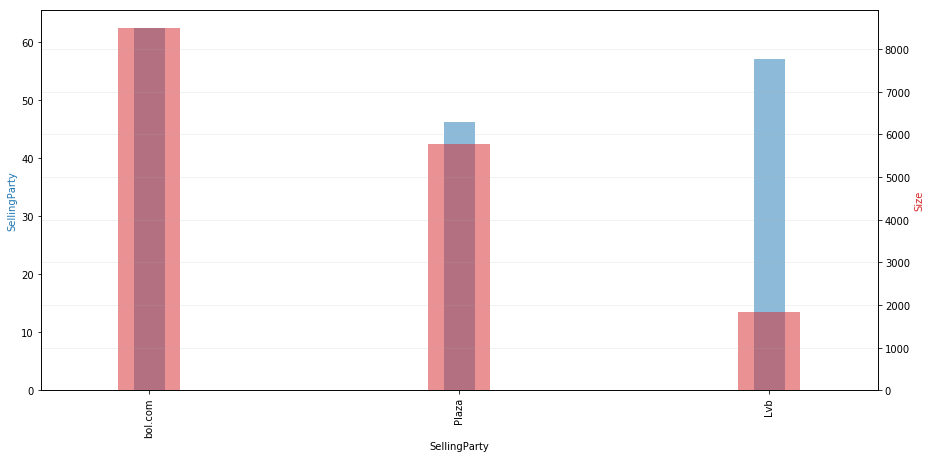

In [168]:
groupedplot(df2, 'SellingParty')

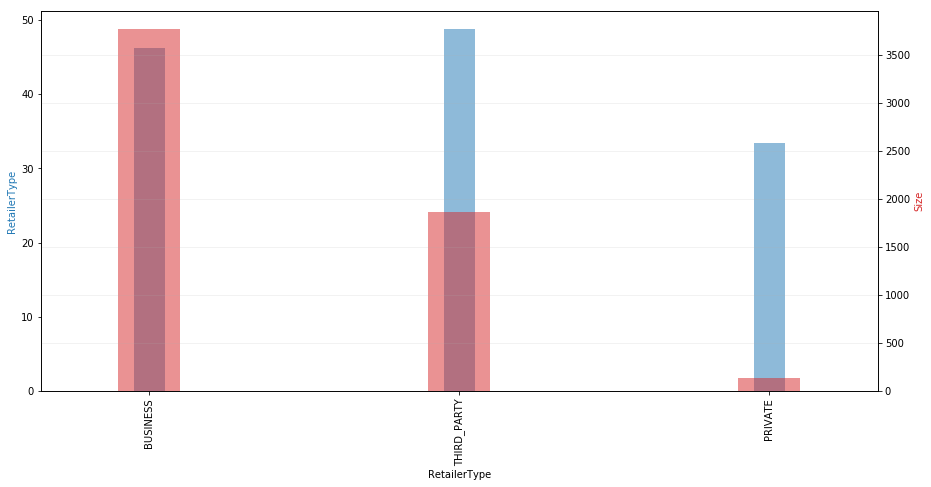

In [169]:
groupedplot(df2[df2['SellingParty'] == 'Plaza'], 'RetailerType')

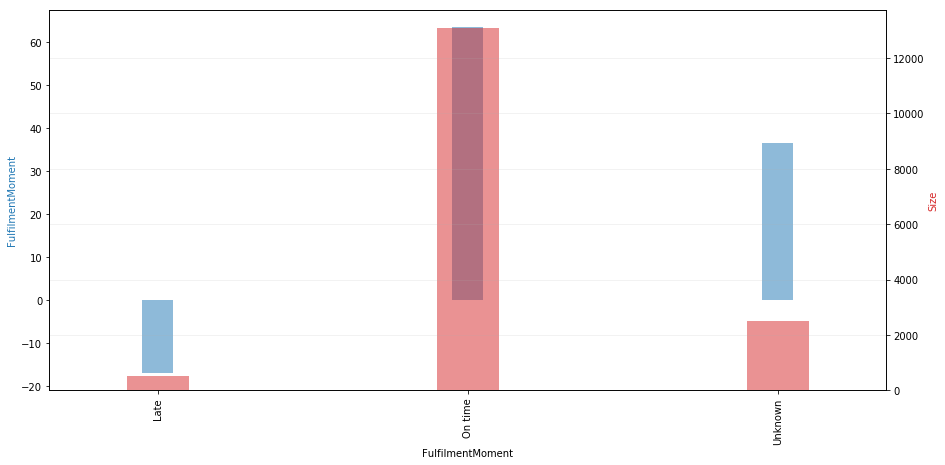

In [109]:
groupedplot(df2, 'FulfilmentMoment')

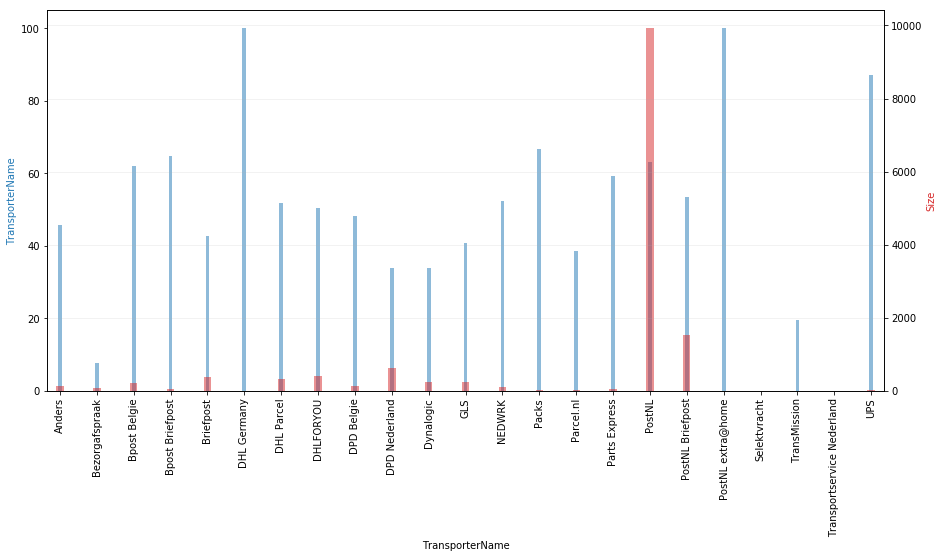

In [110]:
groupedplot(df2, 'TransporterName')

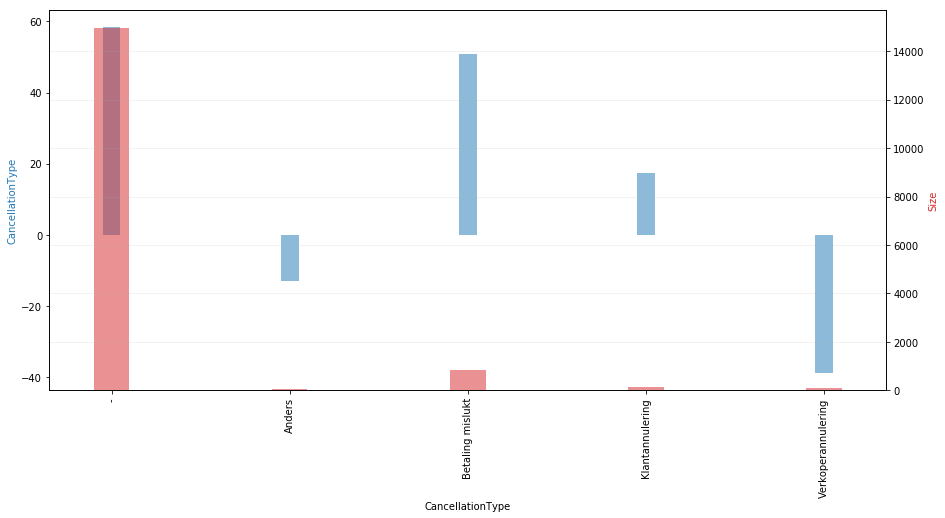

In [111]:
groupedplot(df2, 'CancellationType')

# Under this section is data analysed that is a combination of nps - superjoin - dpd spider data.
Main outcome of this first inspection is that people are not very happy about deliveries to parcelshops.

The data that is used for this is spidered data (by ourselves) from DPD Track&Trace codes. Outcome of spider proces was a jason format with information about the delivery. The 4 categories were shipmentinfo, statusinfo, contactinfo & scaninfo.

The data was prepared in BQ and save as a table to prevent high costs when querying much. 

In [155]:
query= """
SELECT * FROM `bolcom-pro-plato-vpm-615.kkonings.table_nps_sj_dpd`
 """
df = bq_client.query(query).to_dataframe()

## Inspect data

In [136]:
df

,YearOrder,MonthOrder,retailerid,npsType,npsScore,Weight,WeightPromotor,WeightDetractor,Orderdate,SellingParty,...,TransporterName,CodeTrackTrace,PromisedDeliveryDate,FulfilmentMoment,Content,DeliveredToParcelShop,DeliverAttemptNotSuccesful,ExcuseLateDelivery,DateOnderweg,Levermoment
0,2019,3,951579,Detractor,3,1.235189,0.000000,1.235189,2019-03-13 00:00:00+00:00,Plaza,...,None,None,2019-03-15,Unknown,None,None,None,None,None,None
1,2019,3,1276324,Promotor,10,1.235189,1.235189,0.000000,2019-03-13 00:00:00+00:00,Plaza,...,DHL Parcel,3SBCC000940942,2019-03-14,On time,None,None,None,None,None,None
2,2019,3,1418238,Promotor,9,1.235189,1.235189,0.000000,2019-03-13 00:00:00+00:00,Plaza,...,DHLFORYOU,3SBDC9055276891,2019-03-14,On time,None,None,None,None,None,None
3,2019,3,922761,Passive,8,0.164704,0.000000,0.000000,2019-03-13 00:00:00+00:00,Plaza,...,DHL Parcel,JVGL0391682200175440,2019-03-14,On time,None,None,None,None,None,None
4,2019,3,787959,Promotor,10,1.942487,1.942487,0.000000,2019-03-13 00:00:00+00:00,Plaza,...,PostNL,3SDLDT247246397,2019-03-14,On time,None,None,None,None,None,None
5,2019,3,995779,Promotor,10,1.942487,1.942487,0.000000,2019-03-13 00:00:00+00:00,Plaza,...,PostNL,3SMYPA053759463,2019-03-14,On time,None,None,None,None,None,None
6,2019,3,1159196,Passive,7,0.105091,0.000000,0.000000,2019-03-13 00:00:00+00:00,Plaza,...,None,None,2019-03-14,Unknown,None,None,None,None,None,None
7,2019,3,854647,Passive,7,0.105091,0.000000,0.000000,2019-03-13 00:00:00+00:00,Plaza,...,None,None,2019-03-14,Unknown,None,None,None,None,None,None
8,2019,3,1159196,Detractor,6,0.105091,0.000000,0.105091,2019-03-13 00:00:00+00:00,Plaza,...,Dynalogic,1868110028633,2019-03-14,On time,None,None,None,None,None,None
9,2019,3,1406701,Promotor,10,0.105091,0.105091,0.000000,2019-03-13 00:00:00+00:00,Plaza,...,PostNL,3SFPKY006129959,2019-03-14,On time,None,None,None,None,None,None


In [137]:
df.describe()

,YearOrder,MonthOrder,retailerid,npsScore,Weight,WeightPromotor,WeightDetractor
count,8788.0,8788.000000,8.788000e+03,8788.000000,8788.000000,8788.000000,8788.000000
mean,2019.0,2.006941,1.098307e+06,8.209718,1.240176,0.738211,0.189881
std,0.0,0.826235,2.451078e+05,2.490553,1.076934,1.004133,0.626827
min,2019.0,1.000000,1.000000e+01,0.000000,0.080097,0.000000,0.000000
25%,2019.0,1.000000,9.302670e+05,8.000000,0.513729,0.000000,0.000000
50%,2019.0,2.000000,1.159196e+06,9.000000,0.860535,0.420249,0.000000
75%,2019.0,3.000000,1.296152e+06,10.000000,1.507696,1.009483,0.000000
max,2019.0,3.000000,1.438825e+06,10.000000,16.535598,5.640557,5.640557


In [7]:
df.isnull().mean() * 100

YearOrder                      0.000000
MonthOrder                     0.000000
retailerid                     0.000000
npsType                        0.000000
npsScore                       0.000000
Weight                         0.000000
WeightPromotor                 0.000000
WeightDetractor                0.000000
Orderdate                      0.000000
SellingParty                   0.000000
RetailerType                   0.000000
TransporterName                9.473088
CodeTrackTrace                 8.000000
PromisedDeliveryDate           0.000000
FulfilmentMoment               0.000000
Content                       88.362606
DeliveredToParcelShop         87.796034
DeliverAttemptNotSuccesful    87.796034
ExcuseLateDelivery            87.796034
DateOnderweg                  87.796034
Levermoment                   87.796034
dtype: float64

In total 8825 items of 2019-01-01 up to 2019-04-01. Missing values:
* 9% of the NPS's during that time have no known Transporter name. 
* 8% have no T&T 

HOWEVER: of these NPS's, many fulfillmoment are unknown:


## Impact & main nps

In [146]:
# total weight = 100 %
w_total = df['Weight'].sum()
w_total

10898.663239121632

In [139]:
# nps plaza
nps_plaza = round(((df.sum()['WeightPromotor'] - df.sum()['WeightDetractor'])  / df.sum()['Weight'] * 100),1)
nps_plaza

44.2

In [147]:
# # DPD Belgie | DPD Nederland
df_dpd = df[ (df['TransporterName'] == 'DPD Belgie') | (df['TransporterName'] ==  'DPD Nederland')]
df_dpd
# nps dpd
nps_dpd = round(((df_dpd.sum()['WeightPromotor'] - df_dpd.sum()['WeightDetractor'])  / df_dpd.sum()['Weight'] * 100),1)
nps_dpd

# percentage of total; 
w_dpd = df[ (df['TransporterName'] == 'DPD Belgie') | (df['TransporterName'] ==  'DPD Nederland')]['Weight'].sum()
round(w_dpd / w_total *100 ,0)

12.0

In [167]:
# nps on time 
df_dpd_ot = df_dpd[df_dpd['FulfilmentMoment'] == 'On time']
nps_dpd_ontime = round(((df_dpd_ot.sum()['WeightPromotor'] - df_dpd_ot.sum()['WeightDetractor'])  / df_dpd_ot.sum()['Weight'] * 100),0)

# nps late
df_dpd_lt = df_dpd[df_dpd['FulfilmentMoment'] == 'Late']
nps_dpd_late = round(((df_dpd_lt.sum()['WeightPromotor'] - df_dpd_lt.sum()['WeightDetractor'])  / df_dpd_lt.sum()['Weight'] * 100),0)

# nps unknown
df_dpd_uk = df_dpd[df_dpd['FulfilmentMoment'] == 'Unknown']
nps_dpd_unknown = round(((df_dpd_uk.sum()['WeightPromotor'] - df_dpd_uk.sum()['WeightDetractor'])  / df_dpd_uk.sum()['Weight'] * 100),0)

print("on time dpd" ,nps_dpd_ontime, "late dpd", nps_dpd_late, "unknown dpd", nps_dpd_unknown)

on time dpd 41.0 late dpd -44.0 unknown dpd 33.0


## Filter data. Remove unknown delivery moments. Then plots to gain insights

In [114]:
# filter out unknown delivery's
df = df[df['FulfilmentMoment'] != 'Unknown']

In [10]:
# checking again how many the DPD info accounts to total transactional nps
df.isnull().mean() * 100

YearOrder                      0.000000
MonthOrder                     0.000000
retailerid                     0.000000
npsType                        0.000000
npsScore                       0.000000
Weight                         0.000000
WeightPromotor                 0.000000
WeightDetractor                0.000000
Orderdate                      0.000000
SellingParty                   0.000000
RetailerType                   0.000000
TransporterName                0.000000
CodeTrackTrace                 0.000000
PromisedDeliveryDate           0.000000
FulfilmentMoment               0.000000
Content                       90.429743
DeliveredToParcelShop         90.274244
DeliverAttemptNotSuccesful    90.274244
ExcuseLateDelivery            90.274244
DateOnderweg                  90.274244
Levermoment                   90.274244
dtype: float64

In [5]:
groupedplot(df,'FulfilmentMoment')

NameError: name 'groupedplot' is not defined

In [118]:
df['dummy_tt_unknown'] = df['CodeTrackTrace'].isnull()

   dummy_tt_unknown  Size  Percentage   NPS   NPS weight  NPS verhouding  \
0             False  7074       100.0  50.0  8877.871885           100.0   

   NPS weight of total %  
0                  100.0  


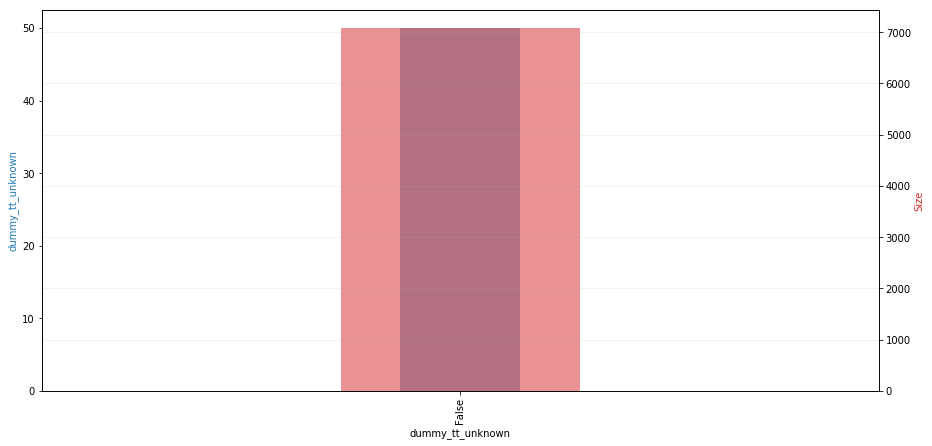

In [13]:
# of all the unknown & ontime are T&T's known
groupedplot(df,'dummy_tt_unknown')

      TransporterName  Size  Percentage    NPS   NPS weight  NPS verhouding  \
0              PostNL  2839   40.132881   59.0  3127.581297       35.228953   
1    PostNL Briefpost   909   12.849873   45.0  1431.234428       16.121368   
2           DHLFORYOU   614    8.679672   55.0   937.632361       10.561454   
3       DPD Nederland   557    7.873904   31.0   714.311855        8.045981   
4           Briefpost   552    7.803223   42.0   984.798750       11.092734   
5          DHL Parcel   448    6.333051   52.0   578.771256        6.519257   
6                 GLS   356    5.032513   40.0   420.023523        4.731128   
7           Dynalogic   207    2.926209   44.0    55.952936        0.630252   
8              Anders   199    2.813118   37.0   160.209108        1.804589   
9          DPD Belgie   131    1.851852   45.0   136.310977        1.535401   
10       Bpost Belgie   122    1.724625   55.0   180.580168        2.034048   
11    Bpost Briefpost    45    0.636132   60.0    50

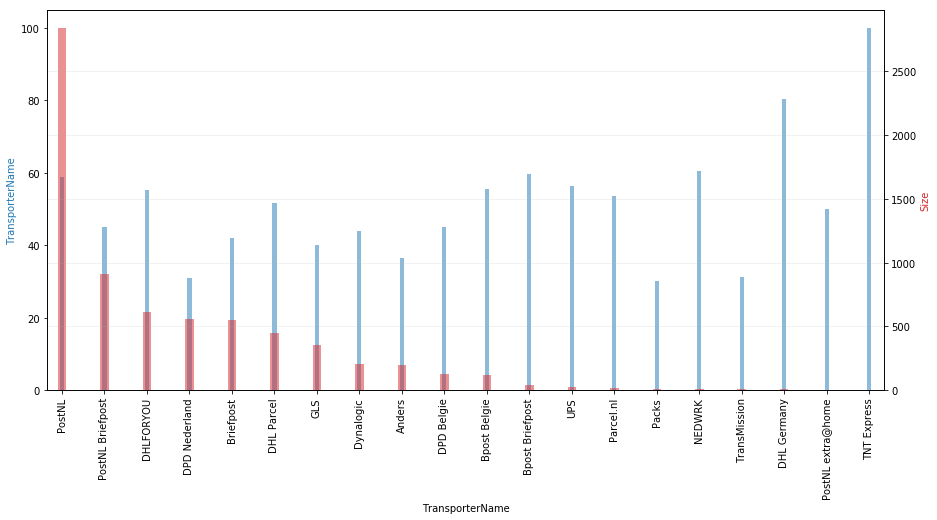

In [110]:
# Around 10% of the 'On time' and 'Late' Deliveries, which have a transactional NPS, are from DPD
# NL vs BE
groupedplot(df,'TransporterName')

In [118]:
#   data1 = ((df.sum()['WeightPromotor'] - df.sum()['WeightDetractor'])  / df.sum()['Weight'] * 100).reset_index()

nps_ontime = df[df['FulfilmentMoment'] == 'On time'] 
nps_ontime = nps_ontime[nps_ontime['DeliveredToParcelShop'].notnull()]
print(len(nps_ontime))
nps_ontime = (nps_ontime.sum()['WeightPromotor'] - nps_ontime.sum()['WeightDetractor'])  / nps_ontime.sum()['Weight'] * 100
print(nps_ontime)

611
41.97305717563219


## Total impact

In [152]:
# check impact on total; 
for i in set(df_dpd['FulfilmentMoment']):
    #for i2 in set(df['DeliveredToParcelShop']):
        w = df_dpd[ (df_dpd['FulfilmentMoment'] == i) ]['Weight'].sum() 
        print(i, 
              round(w / w_total *100 ,2)
                        )

Late 0.79
Unknown 4.07
On time 6.96


In [154]:
# check impact on total; 
for i in set(df_dpd['DeliveredToParcelShop']):
    w = df_dpd[ (df_dpd['DeliveredToParcelShop'] == i) ]['Weight'].sum() 
    print(i, round(w / w_total *100 ,2))

False 9.77
True 1.55
None 0.0


In [148]:

for i in set(df['FulfilmentMoment']):
    for i2 in set(df['DeliveredToParcelShop']):
        w = df[ (df['FulfilmentMoment'] == i) & (df['DeliveredToParcelShop'] ==  i2)]['Weight'].sum() 
        print(i, 
              i2, 
              round(w / w_total *100 ,2)
                        )

Late False 0.61
Late None 0.0
Late True 0.18
Unknown False 3.37
Unknown None 0.0
Unknown True 0.2
On time False 5.78
On time None 0.0
On time True 1.17


## Checking out differences in NPS with corresponding impact (=size) 

In [122]:
df = df[df['DeliveredToParcelShop'] != 'None']

All
   DeliveredToParcelShop  Size  Percentage   NPS   NPS weight  NPS verhouding  \
0                  False   948   88.432836  41.0  1064.864484       86.287207   
1                   True   124   11.567164 -16.0   169.228636       13.712793   

   NPS weight of total %  
0               9.770597  
1               1.552747  


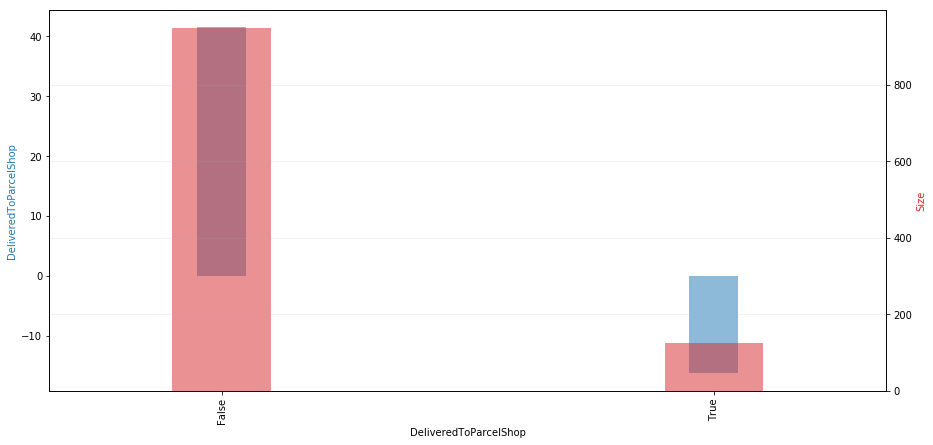

On time
   DeliveredToParcelShop  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0                  False   523    86.30363  53.0  630.289497       83.131796   
1                   True    83    13.69637 -18.0  127.891519       16.868204   

   NPS weight of total %  
0               7.549696  
1               1.531902  


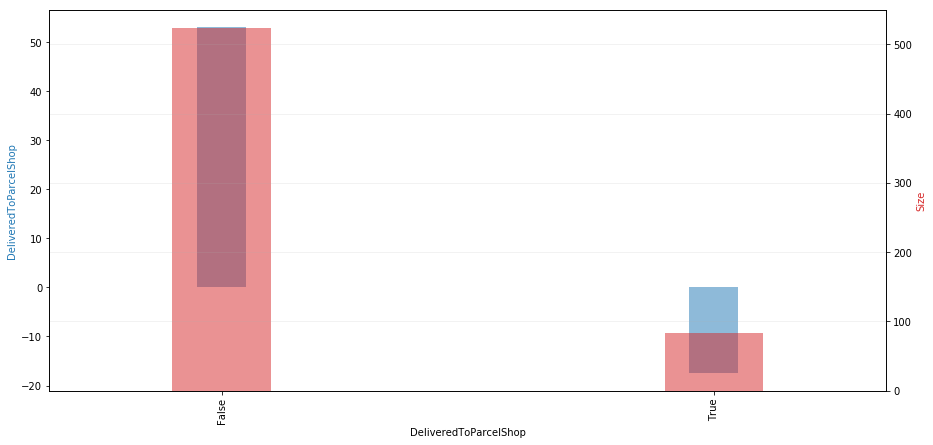

Late
   DeliveredToParcelShop  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0                  False    61   79.220779 -41.0   66.984235       77.797773   
1                   True    16   20.779221 -53.0   19.116218       22.202227   

   NPS weight of total %  
0              13.526270  
1               3.860179  


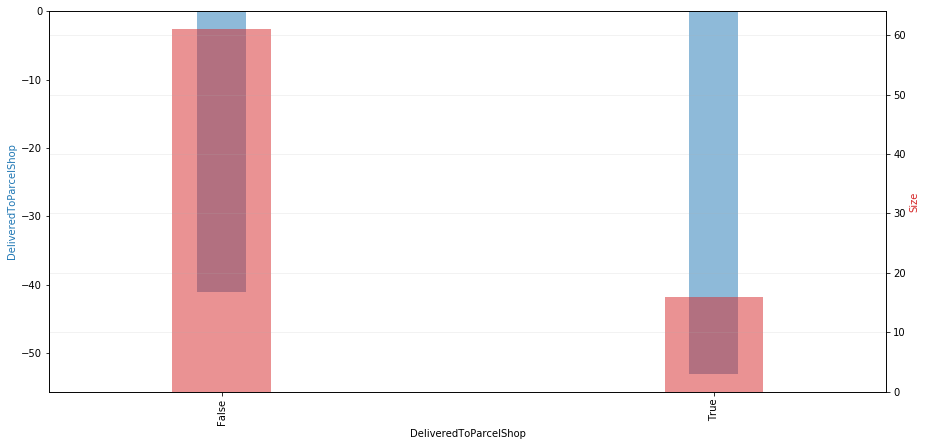

Unknown
   DeliveredToParcelShop  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0                  False   364   93.573265  37.0  367.590752       94.299581   
1                   True    25    6.426735  22.0   22.220899        5.700419   

   NPS weight of total %  
0              17.888450  
1               1.081359  


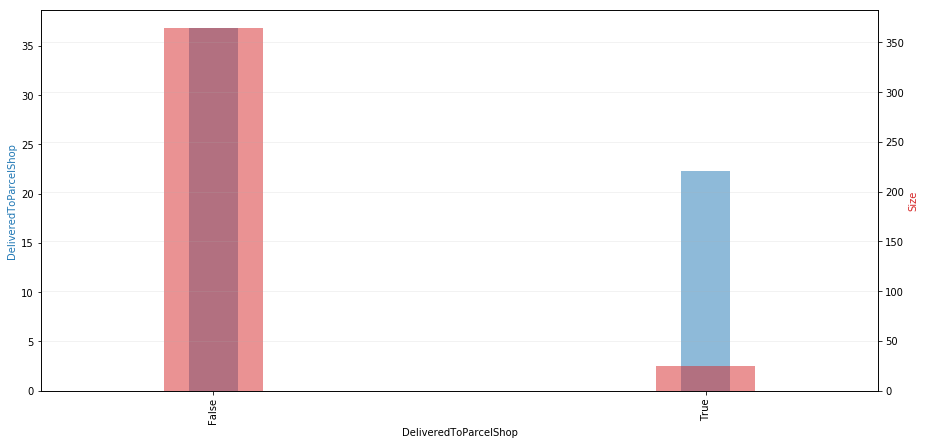

In [161]:
# checking delivery to parcelshop ; 
print('All')
groupedplot(df,'DeliveredToParcelShop')
print('On time')
groupedplot(df[df['FulfilmentMoment'] == 'On time'],'DeliveredToParcelShop')
print('Late')
groupedplot(df[df['FulfilmentMoment'] == 'Late'],'DeliveredToParcelShop')
print('Unknown')
groupedplot(df[df['FulfilmentMoment'] == 'Unknown'],'DeliveredToParcelShop')

Above you see the following:
* Deliveries to parcel shop have lower NPS 
* Especially when you look at the on time deliveries, than it makes people very unhappy (13%). However this number was for DPD in 3 month quite small; 82 people

In [16]:
impact = df.groupby('DeliveredToParcelShop').sum()['Weight']  / df.groupby('DeliveredToParcelShop').sum()['Weight'].sum()
print(impact)

DeliveredToParcelShop
False    0.829532
True     0.170468
Name: Weight, dtype: float64


In [17]:
impact = df.groupby(['DeliveredToParcelShop', 'npsType']).sum()['Weight'] 
print(impact)
print('Bij parcenshop delivered')
impact_parcelshoptrue = df[df['DeliveredToParcelShop'] == True].groupby(
    ['DeliveredToParcelShop', 'npsType']).sum()['Weight'] / df[df['DeliveredToParcelShop'] == True].groupby(
    ['DeliveredToParcelShop', 'npsType']).sum()['Weight'].sum()
print(impact_parcelshoptrue)
print('Niet bij parcelshop')
impact_parcelshopfalse = df[df['DeliveredToParcelShop'] == False].groupby(
    ['DeliveredToParcelShop', 'npsType']).sum()['Weight'] / df[df['DeliveredToParcelShop'] == False].groupby(
    ['DeliveredToParcelShop', 'npsType']).sum()['Weight'].sum()
print(impact_parcelshopfalse)

DeliveredToParcelShop  npsType  
False                  Detractor    107.950561
                       Passive      175.783960
                       Promotor     421.884250
True                   Detractor     74.267217
                       Passive       27.123712
                       Promotor      43.613132
Name: Weight, dtype: float64
Bij parcenshop delivered
DeliveredToParcelShop  npsType  
True                   Detractor    0.512173
                       Passive      0.187055
                       Promotor     0.300772
Name: Weight, dtype: float64
Niet bij parcelshop
DeliveredToParcelShop  npsType  
False                  Detractor    0.152987
                       Passive      0.249120
                       Promotor     0.597893
Name: Weight, dtype: float64


Door het bezorgen bij een parcelshop krijg je verhoudingsgewijs minder passives en minder promotors, die worden detractors

## Verschil BE - NL
Not investigated here. Also not so many datapoints to make this distiction. Distinction could possibly made when looking at a longer period.

# Samenvatting Afhaalpunt DPD:

Veel lagere NPS bij levering afhaalpunt dan wanneer de levering niet is bezorgd op afhaalpunt (44 vs -21). Wanneer wat dieper in de data gekeken wordt: 
* Verschil het grootst bij On Time leveringen (53, -16). Verschil bij late is relatief klein, en daar zijn beide NPS'en (parcelshop / niet parcelshop negatief). Scores zijn hier -41 en -53.
* Aanhakend daarop: de data sizes van zowel on time als late zijn niet heel erg groot (on time = 611, late = 77 records known)


Verder ingezoomd op het grote NPS verschil van de On time leveringen: 
* Door de bezorging bij een parcelshop krijg je minder promotors helaas. Bovendien, wanneer pakketjes bezorgd worden bij een afhaalpunt, zijn mensen minder neutraal want er zijn ook minder passives.

   ExcuseLateDelivery  Size  Percentage  NPS weight  NPS verhouding  \
0               False    73   94.805195   78.751752       91.536333   
1                True     4    5.194805    7.281574        8.463667   

   NPS weight of total %  
0              15.936604  
1               1.473536  


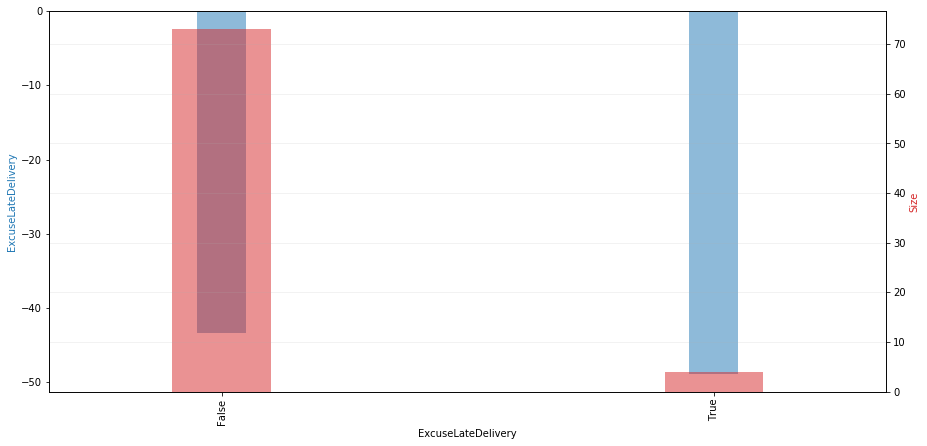

   ExcuseLateDelivery  Size  Percentage  NPS weight  NPS verhouding  \
0               False   576   94.271686  712.039499        93.12703   
1                True    35    5.728314   52.550008         6.87297   

   NPS weight of total %  
0               8.493126  
1               0.626810  


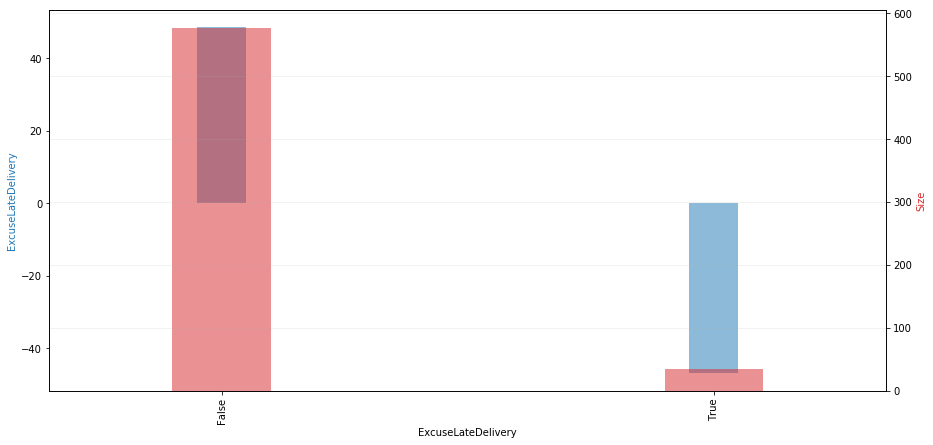

In [355]:
# excuse for late delivery moment wordt weinig toegepast. 
groupedplot(df[df['FulfilmentMoment'] == 'Late'],'ExcuseLateDelivery')
groupedplot(df[df['FulfilmentMoment'] == 'On time'],'ExcuseLateDelivery' )

Van bovenstaande data hebben we maar  4 resultaten van excuses bij late levering en maar 35 resultaten van excuses bij levering die wel de zelfde dag nog is geleverd. Hier kunnen we dus niets mee helaas.

# Correlation try outs
I did a first try to look at the correlation plot to see what influences NPS positively

In [18]:
y = df['npsScore']
X = df.drop(['YearOrder','MonthOrder','npsType','npsScore','Weight','WeightPromotor','WeightDetractor','Orderdate', 'PromisedDeliveryDate','DateOnderweg'	,'Levermoment','CodeTrackTrace', 'retailerid',	'SellingParty'	], axis = 1)

In [19]:
X.head()

,RetailerType,TransporterName,FulfilmentMoment,Content,DeliveredToParcelShop,DeliverAttemptNotSuccesful,ExcuseLateDelivery,dummy_tt_unknown
0,BUSINESS,Briefpost,On time,None,None,None,None,False
1,BUSINESS,PostNL Briefpost,Late,None,None,None,None,False
3,BUSINESS,DPD Nederland,On time,Deferred parcel,True,True,False,False
4,BUSINESS,GLS,On time,None,None,None,None,False
5,BUSINESS,PostNL,On time,None,None,None,None,False


In [27]:
# Create a set of dummy variables from the sex variable
X = X.astype(str)
dummies = pd.get_dummies(X)
# Join the dummy variables to the main dataframe. In this case not needed;
x_and_y = pd.concat([y, dummies], axis=1)
dummies.head()


,RetailerType_BUSINESS,RetailerType_PRIVATE,RetailerType_THIRD_PARTY,TransporterName_Anders,TransporterName_Bpost Belgie,TransporterName_Bpost Briefpost,TransporterName_Briefpost,TransporterName_DHL Germany,TransporterName_DHL Parcel,TransporterName_DHLFORYOU,...,DeliveredToParcelShop_False,DeliveredToParcelShop_None,DeliveredToParcelShop_True,DeliverAttemptNotSuccesful_False,DeliverAttemptNotSuccesful_None,DeliverAttemptNotSuccesful_True,ExcuseLateDelivery_False,ExcuseLateDelivery_None,ExcuseLateDelivery_True,dummy_tt_unknown_False
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


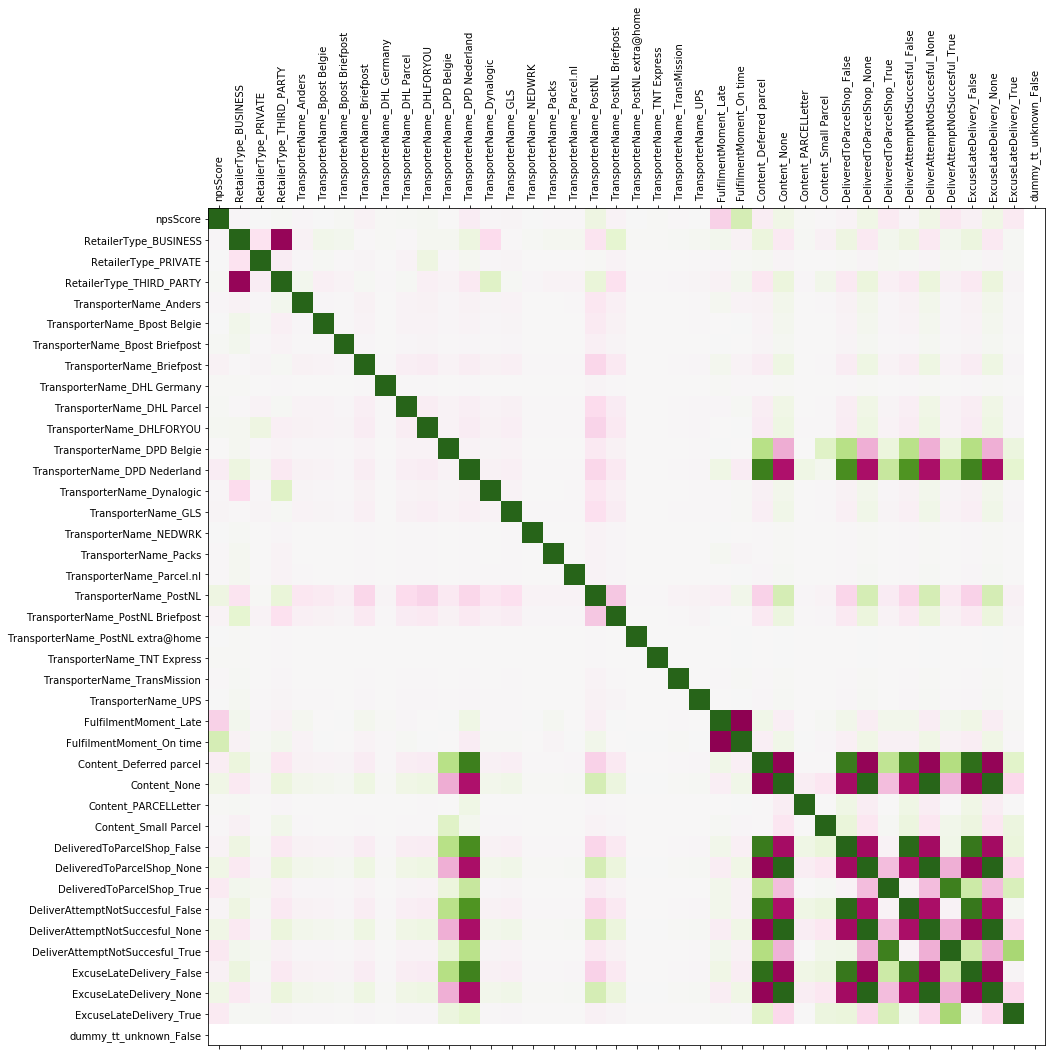

In [105]:
def plot_corr(df,y):
    features_correlation = df.columns
    C = df.corr() #[y].reset_index()
    xx = C.reset_index()[['index', 'npsScore']]
    #print(xx)
    #print(xx.set_index('index'))
    plt.figure(figsize=(15,15))
    plt.matshow(C ,fignum=1,cmap=plt.cm.PiYG)
    plt.yticks(range(len(features_correlation)),features_correlation)
    plt.xticks(range(len(features_correlation)),features_correlation,rotation='vertical')
    plt.show()
    
plot_corr(x_and_y, 'npsScore')

In [8]:
139/8

17.375

# NPS - Alle afhaallocaties; 
Under this section is data used were not only parcelpoints from DPD are in, but also from other transporters. Main conclusion: also here are people not very happy about delivery to parcelshops. Main concern: trustability of the data. The spidered data contained for example more deliveries to parcelshops than our own bol.com data. This makes me wonder the trustability

In [193]:
query= """
SELECT * FROM `bolcom-pro-plato-vpm-615.kkonings.table_nps_sj_pickuppoint_2` 
 """
df = bq_client.query(query).to_dataframe()

In [83]:
df

,YearOrder,MonthOrder,retailerid,shopOrderLinereference,npsType,npsScore,Weight,WeightPromotor,WeightDetractor,Orderdate,SellingParty,RetailerType,TransporterName,PromisedDeliveryDate,FulfilmentMoment,CodeTrackTrace,NietThuis,BijBuren,Afhaallocatie
0,2019,3,701151,1293397905,Detractor,0,2.857951,0.000000,2.857951,2019-03-26 00:00:00+00:00,Plaza,BUSINESS,DHLFORYOU,2019-03-28,On time,3SBDC9060307545,1.0,0.0,0.0
1,2019,3,1438727,1294245223,Detractor,0,0.513391,0.000000,0.513391,2019-03-29 00:00:00+00:00,Plaza,BUSINESS,None,2019-04-01,Unknown,None,NaN,NaN,NaN
2,2019,1,613422,1273754681,Detractor,0,3.047331,0.000000,3.047331,2019-01-10 00:00:00+00:00,Plaza,THIRD_PARTY,DHL Parcel,2019-01-11,On time,3SDST35161811,0.0,0.0,0.0
3,2019,3,1244374,1287302918,Detractor,0,1.071718,0.000000,1.071718,2019-03-02 00:00:00+00:00,Plaza,BUSINESS,PostNL,2019-03-04,On time,3STNVG6916223,0.0,1.0,0.0
4,2019,1,916223,1277906700,Detractor,0,2.114417,0.000000,2.114417,2019-01-25 00:00:00+00:00,Plaza,THIRD_PARTY,DPD Nederland,2019-01-29,On time,05118920809438,0.0,0.0,1.0
5,2019,2,782359,1280171552,Detractor,0,2.079844,0.000000,2.079844,2019-02-02 00:00:00+00:00,Plaza,BUSINESS,PostNL Briefpost,2019-02-05,On time,,0.0,0.0,0.0
6,2019,1,1149400,1271648719,Detractor,0,1.887807,0.000000,1.887807,2019-01-02 00:00:00+00:00,Plaza,THIRD_PARTY,PostNL Briefpost,2019-01-04,Late,,0.0,0.0,0.0
7,2019,1,461,1274555225,Detractor,0,3.693490,0.000000,3.693490,2019-01-13 00:00:00+00:00,Plaza,BUSINESS,DHLFORYOU,2019-01-24,On time,3SBDC9031915368,0.0,0.0,0.0
8,2019,2,1411763,1279918385,Detractor,0,1.629306,0.000000,1.629306,2019-02-01 00:00:00+00:00,Plaza,BUSINESS,PostNL,2019-02-13,Unknown,None,NaN,NaN,NaN
9,2019,1,1338860,1276578358,Detractor,0,3.047331,0.000000,3.047331,2019-01-21 00:00:00+00:00,Plaza,BUSINESS,DPD Nederland,2019-01-23,On time,05118964552581,0.0,0.0,1.0


In [70]:
df.describe()

,YearOrder,MonthOrder,retailerid,shopOrderLinereference,npsScore,Weight,WeightPromotor,WeightDetractor,NietThuis,BijBuren,Afhaallocatie
count,8784.0,8784.000000,8.784000e+03,8.784000e+03,8784.000000,8784.000000,8784.000000,8784.000000,7714.000000,7714.000000,7714.000000
mean,2019.0,2.006717,1.098316e+06,1.283326e+09,8.209927,1.239887,0.738455,0.189977,0.031242,0.044335,0.018408
std,0.0,0.826150,2.449688e+05,6.669539e+06,2.490947,1.077128,1.004541,0.627062,0.173982,0.205852,0.134431
min,2019.0,1.000000,1.000000e+01,1.271187e+09,0.000000,0.080097,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,1.000000,9.302670e+05,1.277487e+09,8.000000,0.513391,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.0,2.000000,1.159196e+06,1.283725e+09,9.000000,0.859970,0.423275,0.000000,0.000000,0.000000,0.000000
75%,2019.0,3.000000,1.295640e+06,1.288955e+09,10.000000,1.507696,1.009483,0.000000,0.000000,0.000000,0.000000
max,2019.0,3.000000,1.438825e+06,1.294814e+09,10.000000,16.535598,5.640557,5.640557,1.000000,1.000000,1.000000


## impact 

In [26]:
# total weight = 100 %
w_total = df['Weight'].sum()
w_total

10891.163874882104

In [27]:
# nps plaza
nps_plaza = round(((df.sum()['WeightPromotor'] - df.sum()['WeightDetractor'])  / df.sum()['Weight'] * 100),1)
nps_plaza

44.2

In [42]:
# percentage of known fulfillements ( bezorging is niet onbekend)
w_fulfillment_known = df[df['FulfilmentMoment'] == 'Unknown']['Weight'].sum()
round(w_fulfillment_known / w_total *100 ,0)

# nps bezorging niet onbekend
gr = df[df['FulfilmentMoment'] == 'Unknown']
nps_fulfillment_known = round(((gr.sum()['WeightPromotor'] - gr.sum()['WeightDetractor'])  / gr.sum()['Weight'] * 100),1)
nps_fulfillment_known

20.7

In [36]:
# percentage on time of total
w_ontime = df[df['FulfilmentMoment'] == 'On time']['Weight'].sum()
round(w_ontime / w_total *100 ,0)

# nps bezorging on time
gr = df[df['FulfilmentMoment'] == 'On time']
nps_fulfillment_ontime = round(((gr.sum()['WeightPromotor'] - gr.sum()['WeightDetractor'])  / gr.sum()['Weight'] * 100),1)
nps_fulfillment_ontime

54.0

In [37]:
# percentage late of total
w_late = df[df['FulfilmentMoment'] == 'Late']['Weight'].sum()
round(w_late / w_total *100 ,0)

# nps bezorging late
gr = df[df['FulfilmentMoment'] == 'Late']
nps_fulfillment_late = round(((gr.sum()['WeightPromotor'] - gr.sum()['WeightDetractor'])  / gr.sum()['Weight'] * 100),1)
nps_fulfillment_late

-22.5

## plots

  FulfilmentMoment  Size  Percentage   NPS   NPS weight  NPS verhouding  \
0          On time  6647   75.671676  54.0  8347.639847       76.645985   
1          Unknown  1743   19.842896  21.0  2049.674287       18.819607   
2             Late   394    4.485428 -22.0   493.849741        4.534407   

   NPS weight of total %  
0              76.645985  
1              18.819607  
2               4.534407  


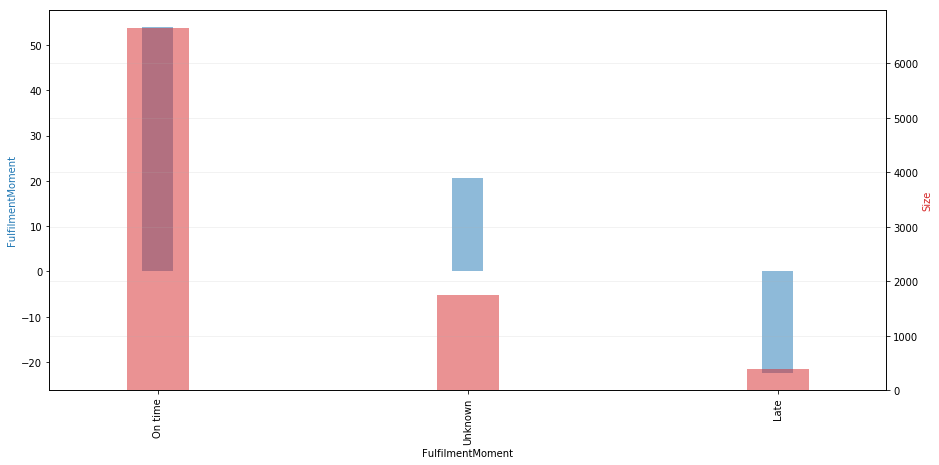

In [15]:
groupedplot(df, 'FulfilmentMoment')

In [24]:
#df = df[df['FulfilmentMoment'] != 'Unknown']

# nps bezorging bekend.
ps_bez_bek = round(((df.sum()['WeightPromotor'] - df.sum()['WeightDetractor'])  / df.sum()['Weight'] * 100),1)
nps_bez_bek

49.7

## verschillende afleverplaatsen 

In [194]:
df['LeverPlaats'] = np.where(df['Afhaallocatie'] == 1, 'Afhaallocatie', 
             np.where(df['BijBuren'] == 1, 'BijBuren' , 'Unknown') 
            )
df['LeverPlaats'].head()


0          Unknown
1          Unknown
2          Unknown
3         BijBuren
4    Afhaallocatie
Name: LeverPlaats, dtype: object

     LeverPlaats  Size  Percentage   NPS   NPS weight  NPS verhouding  \
0        Unknown  6190   93.124718  55.0  7760.969095       92.972016   
1       BijBuren   328    4.934557  56.0   410.685572        4.919781   
2  Afhaallocatie   129    1.940725 -10.0   175.985180        2.108203   

   NPS weight of total %  
0              92.972016  
1               4.919781  
2               2.108203  


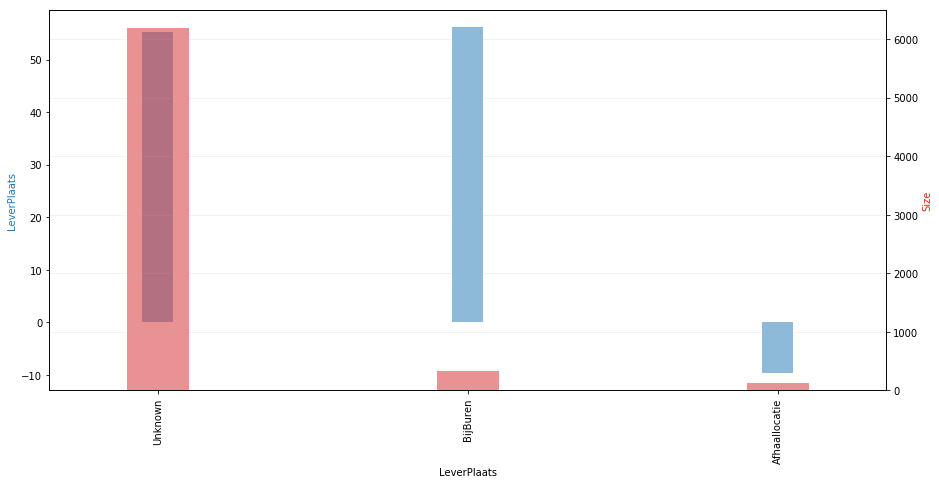

     LeverPlaats  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0        Unknown   369   93.654822 -21.0  461.186496       93.385995   
1  Afhaallocatie    13    3.299492 -33.0   15.354261        3.109096   
2       BijBuren    12    3.045685 -50.0   17.308985        3.504909   

   NPS weight of total %  
0              93.385995  
1               3.109096  
2               3.504909  


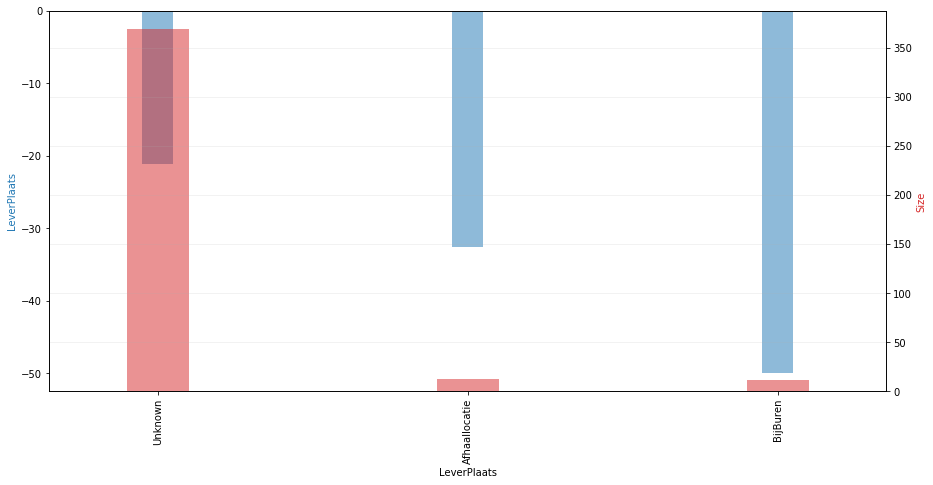

  LeverPlaats  Size  Percentage    NPS   NPS weight  NPS verhouding  \
0     Unknown  1742   99.942628   21.0  2048.293366       99.932627   
1    BijBuren     1    0.057372  100.0     1.380920        0.067373   

   NPS weight of total %  
0              99.932627  
1               0.067373  


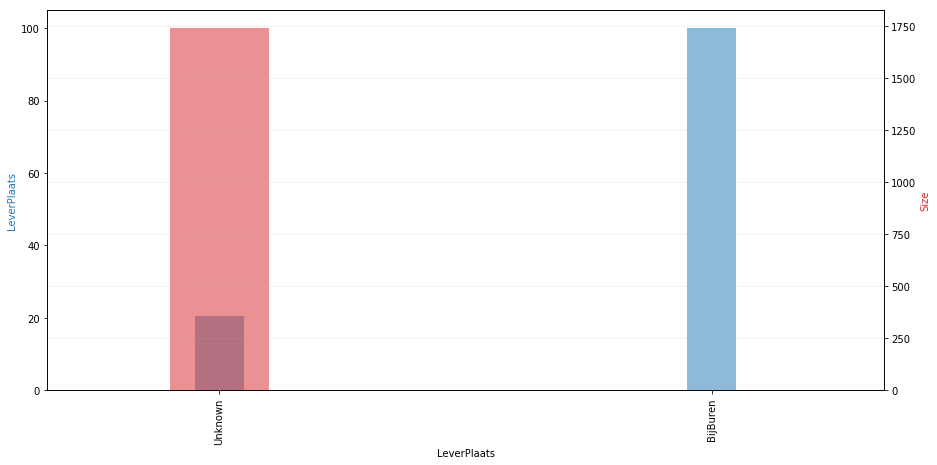

In [73]:
groupedplot(df[df['FulfilmentMoment'] == 'On time'],'LeverPlaats')
groupedplot(df[df['FulfilmentMoment'] == 'Late'],'LeverPlaats')
groupedplot(df[df['FulfilmentMoment'] == 'Unknown'],'LeverPlaats')

In [223]:

# check waar we data hebben van BijBuren of Afhaallocatie
enough_data = df.groupby(('LeverPlaats', 'TransporterName')).size().reset_index()
enough_data = list(set(enough_data[(enough_data['LeverPlaats'] == 'Afhaallocatie') | (enough_data['LeverPlaats'] == 'BijBuren')]['TransporterName']))



/Users/kkonings/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until


PostNL Briefpost
  LeverPlaats  Size  Percentage   NPS   NPS weight  NPS verhouding  \
0     Unknown   855   99.883178  48.0  1343.752212       99.581993   
1    BijBuren     1    0.116822   0.0     5.640557        0.418007   

   NPS weight of total %  
0              99.581993  
1               0.418007  


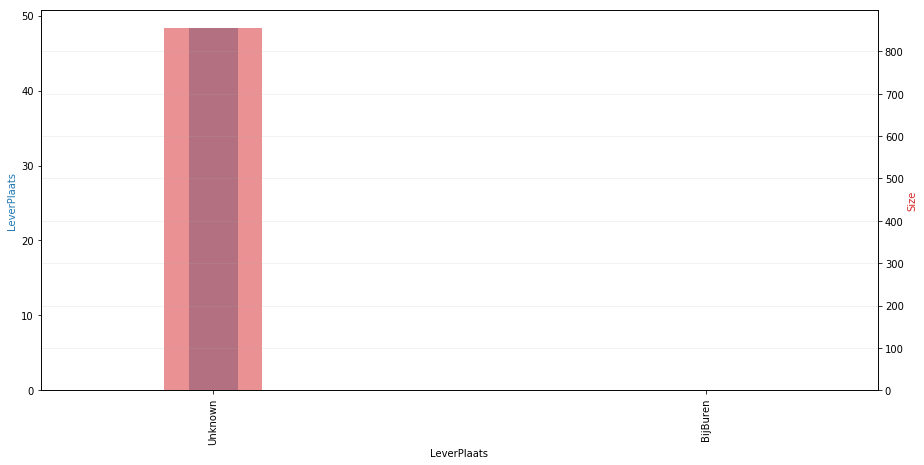

Bpost Belgie
     LeverPlaats  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0        Unknown   110   94.017094  63.0  161.600873       94.294928   
1  Afhaallocatie     7    5.982906   1.0    9.777244        5.705072   

   NPS weight of total %  
0              94.294928  
1               5.705072  


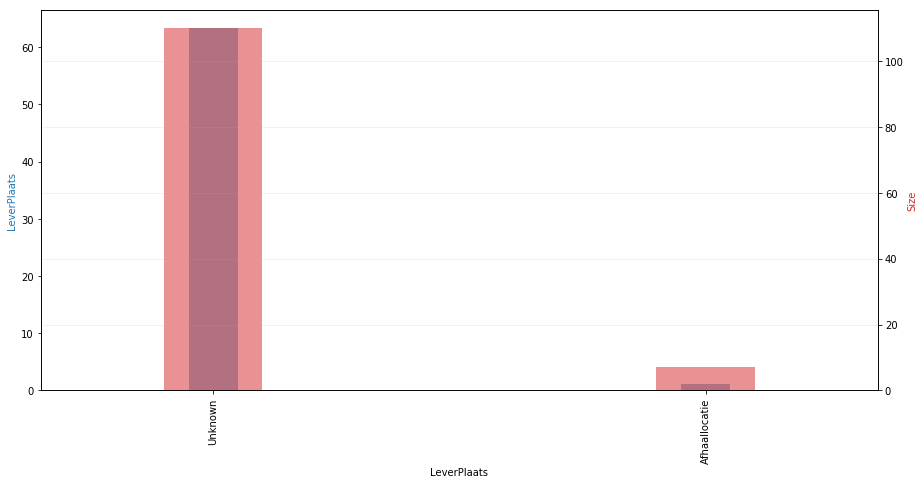

GLS
  LeverPlaats  Size  Percentage    NPS  NPS weight  NPS verhouding  \
0     Unknown   336   99.115044   42.0  404.009634       99.254472   
1    BijBuren     3    0.884956  100.0    3.034629        0.745528   

   NPS weight of total %  
0              99.254472  
1               0.745528  


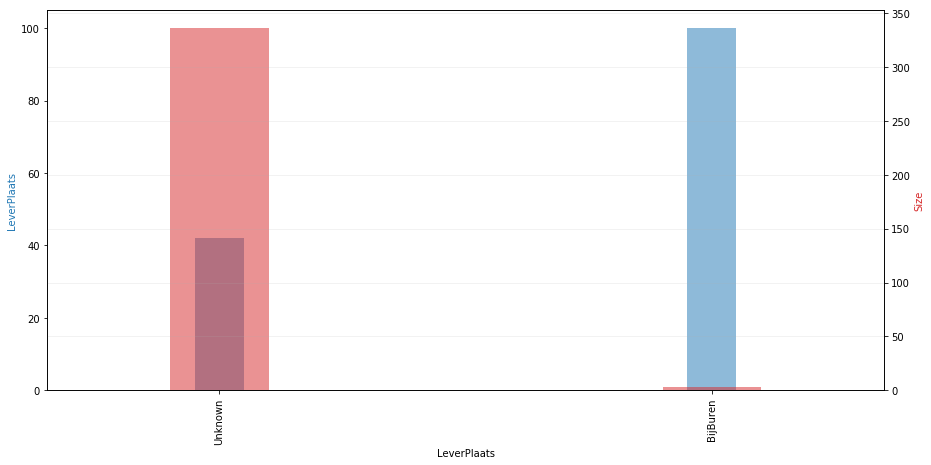

DPD Nederland
     LeverPlaats  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0        Unknown   399   82.608696  53.0  508.202844       80.493397   
1  Afhaallocatie    57   11.801242 -42.0   83.505963       13.226369   
2       BijBuren    27    5.590062  32.0   39.650863        6.280234   

   NPS weight of total %  
0              80.493397  
1              13.226369  
2               6.280234  


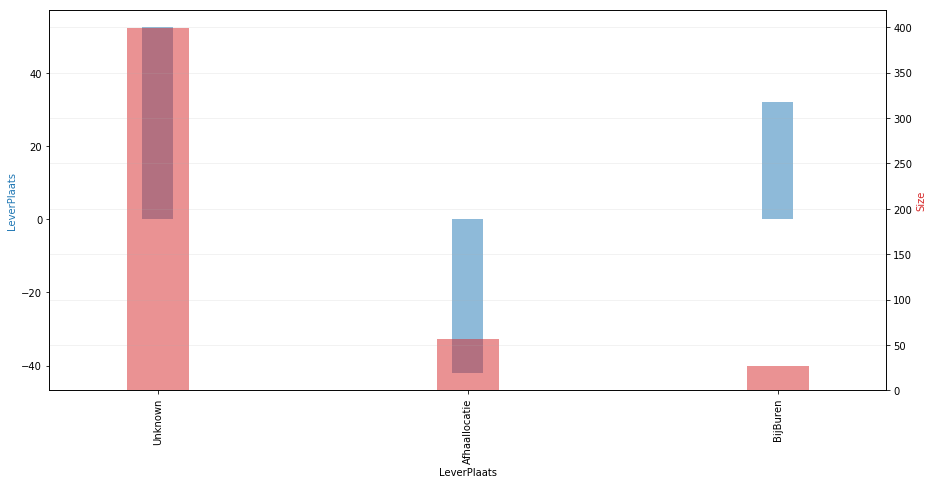

DPD Belgie
     LeverPlaats  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0        Unknown    99   81.147541  56.0   93.484384       74.467106   
1  Afhaallocatie    13   10.655738  32.0   19.571737       15.590311   
2       BijBuren    10    8.196721  57.0   12.481702        9.942583   

   NPS weight of total %  
0              74.467106  
1              15.590311  
2               9.942583  


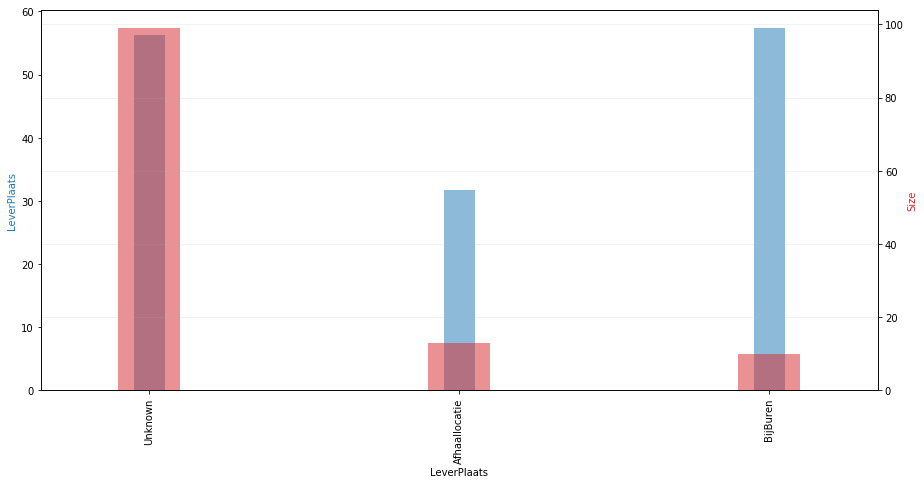

PostNL
     LeverPlaats  Size  Percentage   NPS   NPS weight  NPS verhouding  \
0        Unknown  2507   92.338858  63.0  2763.052144       92.324479   
1       BijBuren   196    7.219153  55.0   216.854891        7.245978   
2  Afhaallocatie    12    0.441989 -23.0    12.855207        0.429543   

   NPS weight of total %  
0              92.324479  
1               7.245978  
2               0.429543  


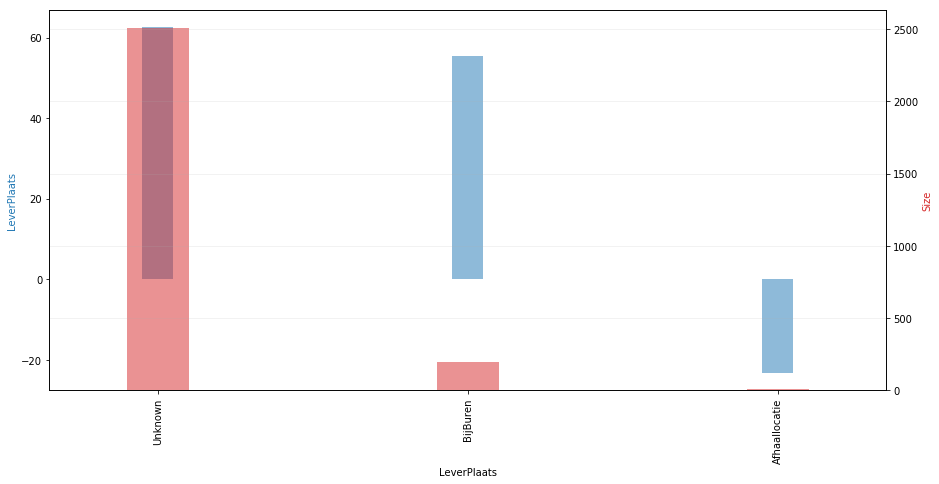

DHLFORYOU
     LeverPlaats  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0        Unknown   493   86.038394  57.0  771.252419       87.454318   
1       BijBuren    64   11.169284  69.0   91.103823       10.330499   
2  Afhaallocatie    16    2.792321  42.0   19.535508        2.215182   

   NPS weight of total %  
0              87.454318  
1              10.330499  
2               2.215182  


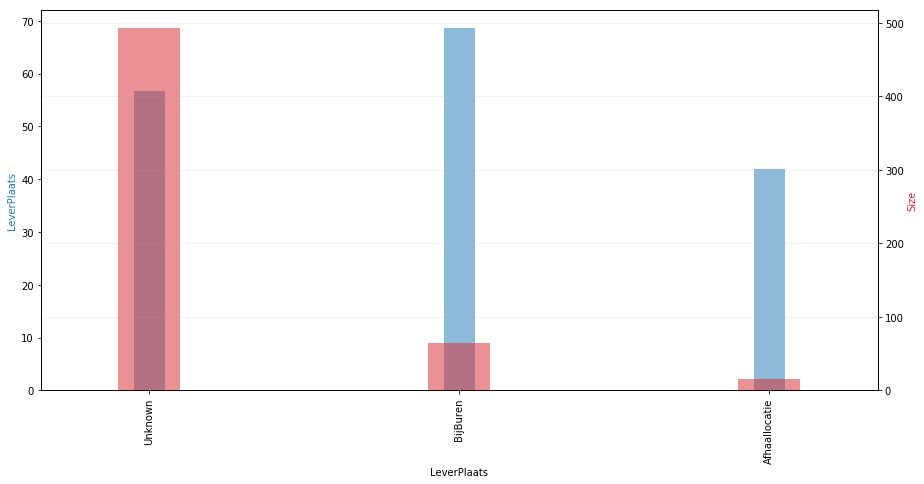

DHL Parcel
     LeverPlaats  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0        Unknown   382   88.221709  57.0  483.496982       86.935558   
1       BijBuren    27    6.235566  60.0   41.919107        7.537298   
2  Afhaallocatie    24    5.542725  22.0   30.739521        5.527144   

   NPS weight of total %  
0              86.935558  
1               7.537298  
2               5.527144  


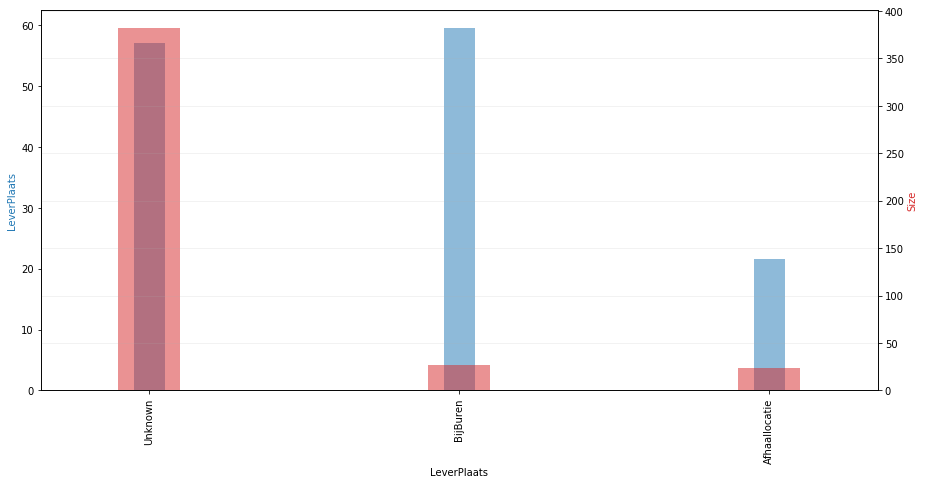

In [224]:
for i in enough_data:
    print(i)
    groupedplot(df[(df['FulfilmentMoment'] == 'On time') & (df['TransporterName'] == i)],'LeverPlaats')
#     groupedplot(df[df['FulfilmentMoment'] == 'Late'& df['TransporterName'] == i],'LeverPlaats')
#     groupedplot(df[df['FulfilmentMoment'] == 'Unknown'& df['TransporterName'] == i],'LeverPlaats')

## look at nps and . % separate 

In [81]:
# percentage buren of total
w_bijburen = df[df['LeverPlaats'] == 'BijBuren']['Weight'].sum()
round(w_bijburen / w_total *100 ,0)

# nps
gr = df[df['LeverPlaats'] == 'BijBuren']
nps_bijburen = round(((gr.sum()['WeightPromotor'] - gr.sum()['WeightDetractor'])  / gr.sum()['Weight'] * 100),1)
nps_bijburen

4.0

In [59]:
# percentage afhaallocatie of total
w_afhaalloc= df[df['LeverPlaats'] == 'Afhaallocatie']['Weight'].sum()
round(w_afhaalloc / w_total *100 ,0)

# nps
gr = df[df['LeverPlaats'] == 'Afhaallocatie']
nps_afhaalloc = round(((gr.sum()['WeightPromotor'] - gr.sum()['WeightDetractor'])  / gr.sum()['Weight'] * 100),1)
nps_afhaalloc

-11.5

In [80]:
# percentage leverplaats is unknown of total
w_afl_unk = df[df['LeverPlaats'] == 'Unknown']['Weight'].sum()
round(w_afl_unk / w_total *100 ,0)

# nps
gr = df[df['LeverPlaats'] == 'Unknown']
nps_unknown = round(((gr.sum()['WeightPromotor'] - gr.sum()['WeightDetractor'])  / gr.sum()['Weight'] * 100),1)
nps_unknown


94.0

## nps fulfillmentmethod = known 

In [ ]:
df = df[df['FulfilmentMoment'] != 'Unknown']

In [67]:
# percentage on known of total
round(df['Weight'].sum() / w_total *100 ,0)

#nps bezorging known
nps_fulfil_known= round(((df.sum()['WeightPromotor'] - df.sum()['WeightDetractor'])  / df.sum()['Weight'] * 100),1)
nps_fulfil_known

49.7

## plots 

   Afhaallocatie  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0            0.0  6515   98.058399  55.0  8167.39090        97.89072   
1            1.0   129    1.941601 -10.0   175.98518         2.10928   

   NPS weight of total %  
0              97.840720  
1               2.108203  


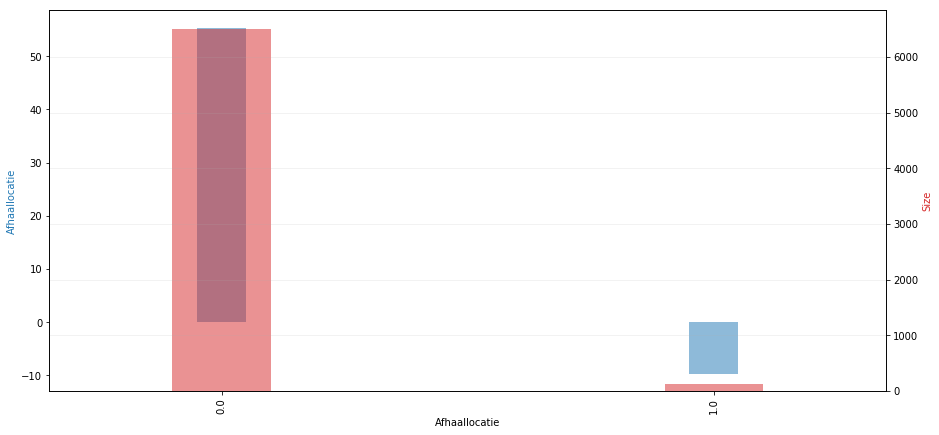

In [63]:
groupedplot(df[df['FulfilmentMoment'] == 'On time'],'Afhaallocatie')


   Afhaallocatie  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0            0.0  6515   98.058399  55.0  8167.39090        97.89072   
1            1.0   129    1.941601 -10.0   175.98518         2.10928   

   NPS weight of total %  
0              97.840720  
1               2.108203  


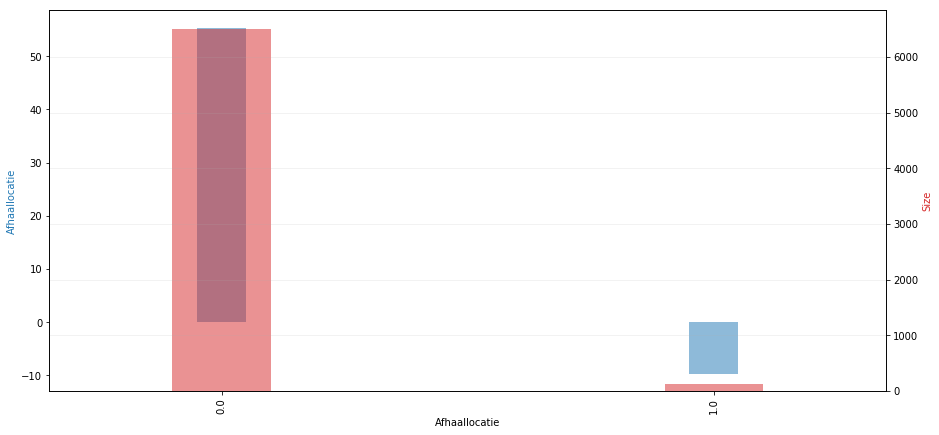

   Afhaallocatie  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0            0.0   380   96.692112 -22.0  476.497798       96.878277   
1            1.0    13    3.307888 -33.0   15.354261        3.121723   

   NPS weight of total %  
0              96.486392  
1               3.109096  


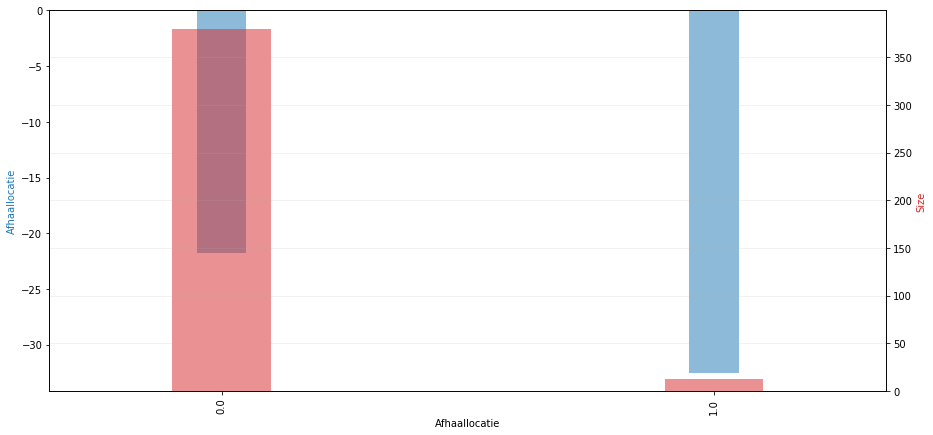

In [23]:
groupedplot(df[df['FulfilmentMoment'] == 'On time'],'Afhaallocatie')
groupedplot(df[df['FulfilmentMoment'] == 'Late'],'Afhaallocatie')

   BijBuren  Size  Percentage   NPS   NPS weight  NPS verhouding  \
0       0.0  6315   95.048164  54.0  7929.832557       95.043451   
1       1.0   329    4.951836  55.0   413.543523        4.956549   

   NPS weight of total %  
0              94.994905  
1               4.954017  


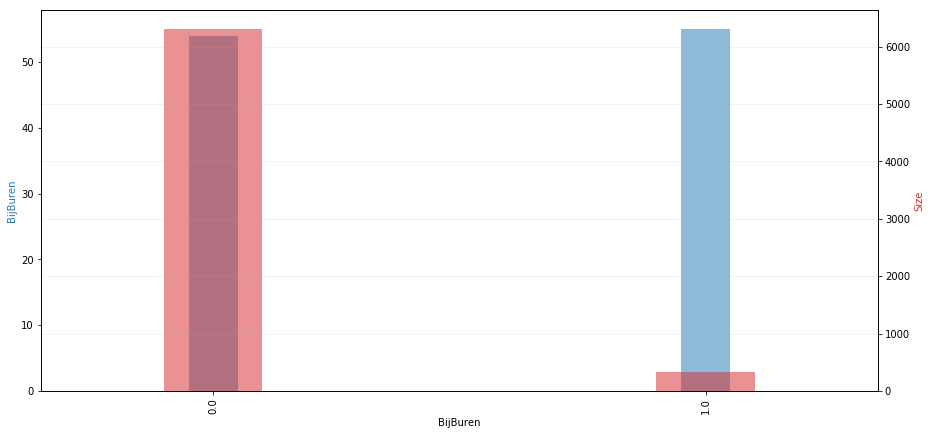

   BijBuren  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0       0.0   381   96.946565 -21.0  474.543074       96.480855   
1       1.0    12    3.053435 -50.0   17.308985        3.519145   

   NPS weight of total %  
0              96.090579  
1               3.504909  


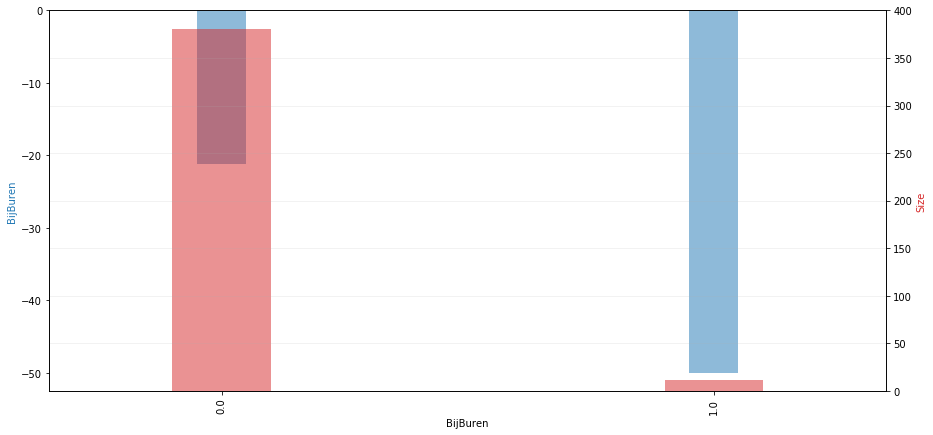

In [22]:
groupedplot(df[df['FulfilmentMoment'] == 'On time'],'BijBuren')
groupedplot(df[df['FulfilmentMoment'] == 'Late'],'BijBuren')

     LeverPlaats  Size  Percentage   NPS   NPS weight  NPS verhouding  \
0        Unknown  6190   93.124718  55.0  7760.969095       92.972016   
1       BijBuren   328    4.934557  56.0   410.685572        4.919781   
2  Afhaallocatie   129    1.940725 -10.0   175.985180        2.108203   

   NPS weight of total %  
0              92.972016  
1               4.919781  
2               2.108203  


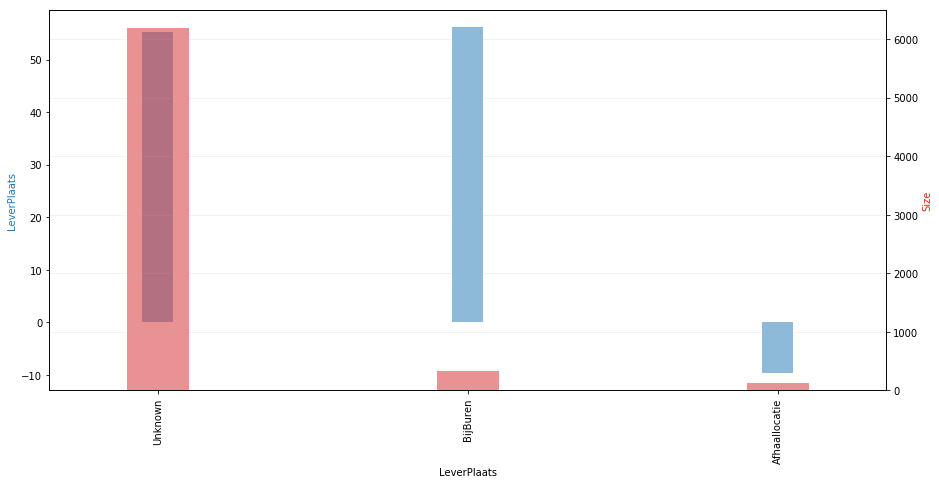

     LeverPlaats  Size  Percentage   NPS  NPS weight  NPS verhouding  \
0        Unknown   369   93.654822 -21.0  461.186496       93.385995   
1  Afhaallocatie    13    3.299492 -33.0   15.354261        3.109096   
2       BijBuren    12    3.045685 -50.0   17.308985        3.504909   

   NPS weight of total %  
0              93.385995  
1               3.109096  
2               3.504909  


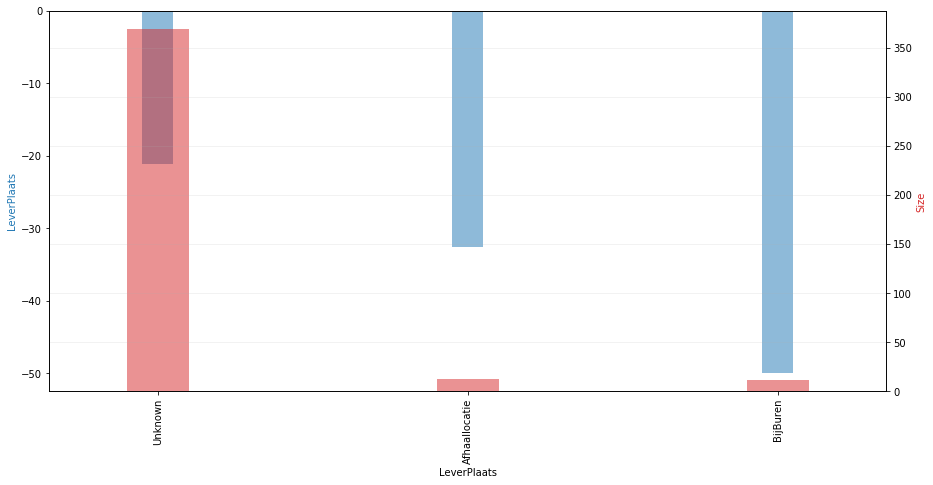

In [28]:
groupedplot(df[df['FulfilmentMoment'] == 'On time'],'LeverPlaats')
groupedplot(df[df['FulfilmentMoment'] == 'Late'],'LeverPlaats')

## IMPACT!

In [100]:
# impact percentage

for i in set(df['FulfilmentMoment']):
    for i2 in set(df['LeverPlaats']):
        w = df[ (df['FulfilmentMoment'] == i) & (df['LeverPlaats'] ==  i2)]['Weight'].sum() 
        print(i, 
              i2, 
              round(w / w_total *100 ,2)
                        )


Late BijBuren 0.16
Late Unknown 4.23
Late Afhaallocatie 0.14
Unknown BijBuren 0.01
Unknown Unknown 18.81
Unknown Afhaallocatie 0.0
On time BijBuren 3.77
On time Unknown 71.26
On time Afhaallocatie 1.62


## Checking out possibly changes to NPS. See presentation for summary

In [185]:
# 2% of total nps plaza = -11.
print(-11.5 * 0.02 )
# 98% of nps plaza = 
print(44.2 - (-11.5 * 0.02 ))

-0.23
44.43


In [192]:
# check up; berekenen nps total plaza;
(44.2 - (-11.5 * 0.02 )) + (-11 * 0.02 )

44.21

In [188]:
# stel parcelshops krijgen nps van 0. Totale nps wordt;
# deel 1 van de som hieronder is de 98%. Deel 2 de parcel points
(44.2 - (-11.5 * 0.02 )) + (0 * 0.02 )

44.43

In [190]:
# stel parcelshops verwijnen. NPS verplaatst naar NPS locatie unknown/ probably at home;
(44.2 - (-11.5 * 0.02 )) + (44.9 * 0.02 )

45.328

In [191]:
# stel helft vd leveringen mindr naar parcels. 
# NPS verplaatst naar NPS locatie unknown/ probably at home;
(44.2 - (-11.5 * 0.02 )) + (44.9 * 0.01 ) + (-11*0.01)

44.769